# 変分線形回帰

In [41]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy import linalg as LA
from scipy.stats import norm
plt.style.use("ggplot")

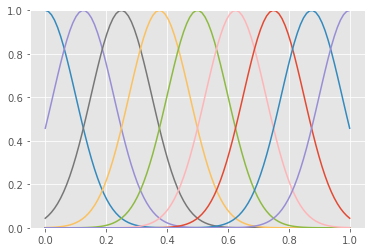

In [42]:
N = 8
M = 10
def gaussian_basis(x):
  # M - dimension
  gamma = 50
  x_ = np.linspace(0,1,M-1)
  return np.append(1, np.exp(-(x - x_)**2 * gamma))

X = np.linspace(0,1,100)
Y = np.array([gaussian_basis(x) for x in X]) #(N,M)
plt.plot(X,Y)
plt.ylim(0,1)
plt.show()

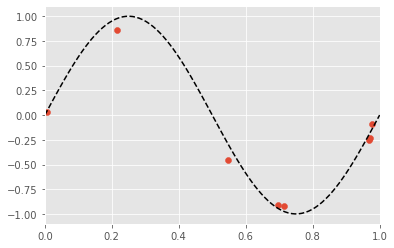

In [43]:
np.random.seed(4)
train_X = np.random.uniform(0, 1, N)
train_t = np.sin(2*np.pi*train_X) + np.random.normal(0,0.1,N)
plt.scatter(train_X, train_t)
plt.xlim(0,1)
x_ = np.linspace(0,1,100)
plt.plot(x_, np.sin(2*np.pi*x_), "k--")
plt.show()

In [44]:
def sigma(x):
  return np.sqrt((1 / beta) + gaussian_basis(x).T @ S_N @ gaussian_basis(x))

def mu(x):
  return m_N.T @ gaussian_basis(x)

def pred_dist(x, t):
  return norm(mu(x), sigma(x)).pdf(t)

Phi = np.array([gaussian_basis(x) for x in train_X]) # (N, M)
print(Phi.shape)

(8, 10)


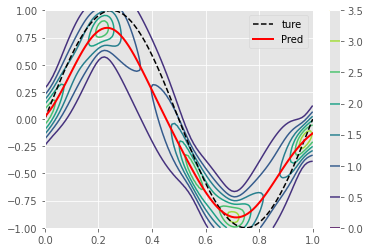

In [45]:
beta = 100
E_alpha = 1.
max_iter = 10

for i in range(max_iter):
  # E step
  S_N = LA.inv( E_alpha*np.eye(M) + beta * Phi.T@Phi ) # (M, M)
  m_N = beta * S_N @ Phi.T @ train_t # (M)

  E_ww = m_N.T@m_N + np.trace(S_N)
  E_alpha_ = M / E_ww

  if (abs(LA.norm(E_alpha - E_alpha_)) / E_alpha_) < 0.0001:
    break

  E_alpha = E_alpha_

X, Y = np.meshgrid(np.linspace(0,1,100), np.linspace(-1,1,100))
Z = np.vectorize(lambda x,y: pred_dist(x,y))(X,Y)
plt.contour(X,Y,Z)
plt.colorbar()
X_ = np.linspace(0,1,100)
plt.plot(X_, np.sin(2 * np.pi * X_), "k--", label="ture")
plt.plot(X_, np.vectorize(mu)(X_), "r", linewidth=2.0, label="Pred")
plt.legend()
plt.show()

## 比較のためにエビデンス近似を実装する

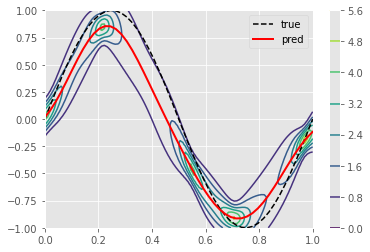

In [66]:
alpha = 1
beta=1

w_, v_ = LA.eigh(Phi.T@Phi) 
# w_, size=(M) eigan values
# v_, size=(M,M) eigan vector

max_iter = 100
for i in range(max_iter):
  S_N = LA.inv(alpha*np.eye(M) + beta*Phi.T@Phi)
  m_N = beta *S_N @ Phi.T @ train_t
  lam = beta * w_ #(M)
  wellDetermined = sum([ l / (l+alpha) for l in lam])
  alpha = wellDetermined / (m_N.T@m_N)
  beta_inv = (train_t - Phi@m_N).T @ (train_t - Phi@m_N) / (N - wellDetermined)
  if abs(LA.norm(1/beta_inv - beta) / beta) < 0.001:
    break
  beta = 1/beta_inv

X,Y = np.meshgrid(np.linspace(0,1,100), np.linspace(-1,1,100))
Z = np.vectorize(pred_dist)(X,Y)
plt.contour(X,Y,Z)
plt.colorbar()
x_ = np.linspace(0,1)
plt.plot(x_, np.sin(2 * np.pi * x_), "k--", label="true")
plt.plot(x_, np.vectorize(mu)(x_), "r", linewidth=2.0, label="pred")
plt.legend()
plt.show()